In [184]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [185]:
df = pd.read_csv("NYC_Restaurants.csv",dtype=str)
df.head()
#len(df.columns)
df.columns
len(df)

44633

#### Q.1. Create a unique name for each restaurant
On the DataFrame created above, add a new column to your DataFrame, called ’RESTAURANT’, that combines DBA, BUILDING, STREET, ZIPCODE,and BORO fields. For example, “WENDY’S 469 FLATBUSH AVENUE 11225 BROOKLYN”. Print the first 10 values of the RESTAURANT column of your DataFrame.

In [186]:
df['RESTAURANT'] = df[['DBA','BUILDING','STREET','ZIPCODE']].apply(lambda x: " ".join(x),axis = 1)
df['RESTAURANT'][:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

#### Q.2. How many restaurants are included in the data? 
Careful now:
• A “Subway” in one particular address (i.e., building, street, zipcode,
and boro) counts as one restaurant; don’t combine all Subways into
one restaurant!
• The data can have multiple violations for the same restaurant!

In [187]:
res_mask = df['RESTAURANT'].unique()
print("Total Number of Restaurants : ",len(res_mask))

Total Number of Restaurants :  10114


#### Q.3. How many chains are there? 
Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).
You’ll see multiple versions of the name ”DUNKIN DONUTS”. Just act as if they are different chains.

In [188]:
df_uniq_res = df.drop_duplicates(subset='RESTAURANT')
chains_mask = df_uniq_res['DBA'].value_counts().values > 1
chains_mask.sum()                                                 

368

#### Q.4.Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Count the number of restaurants for each chain as a measure of its popularity.

<AxesSubplot:>

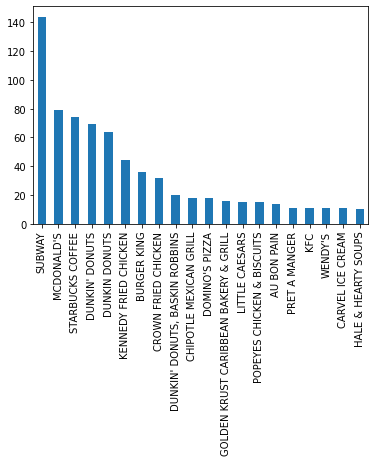

In [247]:
df_uniq_res['DBA'].value_counts()[:20].plot(kind='bar')

#### Q.5. What fraction of all restaurants are chain restaurants?
You should think of a restaurant as being one restaurant at one location. So “Wendy’s 5th Street” and “Wendy’s on 10th Street” are two different restaurants. Essentially a restaurant is what you defined in Q1.

In [249]:
'''
Using the dataframe referring to the unique restaurants based on address.
Computing the actual sum of restaurants for which the sum is more than 1.
'''
non_chains= sum(df_uniq_res['DBA'].value_counts()==1)
chain_res_fraction = (len(res_mask) - non_chains)/len(res_mask)

print("Fraction of all restaurants which are chain restaurants : ", chain_res_fraction)

Fraction of all restaurants which are chain restaurants :  0.16472216729286138


#### Q.6. Plot the number of non-chain restaurants in each boro. 
First, we need to figure out all the non-chain restaurants, then select out only those restaurants, and finally plot the number of such restaurants by boro. Make sure to look at the plot; we don’t want to see... oh... the “missing” boro.

<AxesSubplot:>

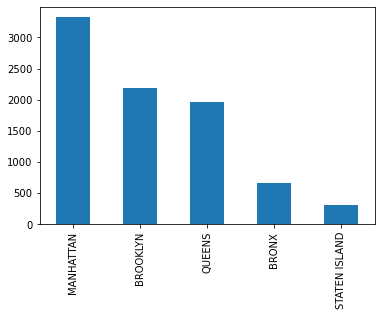

In [327]:
#Replacing 'Missing' Borough names with NaN values
df_uniq_res= df_uniq_res.replace('Missing',np.nan)

# #Dropping rows with NaN values
df_uniq_res.dropna()

# #Creating unique mask for restaurants to find non-chain restaurants - value would be 1 for them
uniq_mask = (df_uniq_res['DBA'].value_counts() == 1)

#Creating dataframe using value_counts() output as a dictionary
df_non_chain = pd.DataFrame({'DBA':uniq_mask.index, 'is_non_chain':uniq_mask.values})


#Adding a column using apply function to assign True - non-chain restaurants value of 1.
df_non_chain['is_non_chain']= df_non_chain['is_non_chain'].apply(lambda x : 1 if x == True else 0)

#Merging the dataframe created with mask with the unique restaurant list using the DBA column.
uniq_res_merge = df_uniq_res.merge(df_non_chain,left_on='DBA',right_on='DBA')

#Selecting all non-chain columns to group with their respective BORO.
uniq_res_merge['BORO'][uniq_res_merge['is_non_chain'] == 1].value_counts().plot(kind='bar')

#### Q.7.Plot the fraction of non-chain restaurants in each boro. 
The boro with the most non-chain restaurants might just be the boro with the most restaurants in general. If we want to find the boro that attracts the most “independent” restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.
Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

<AxesSubplot:>

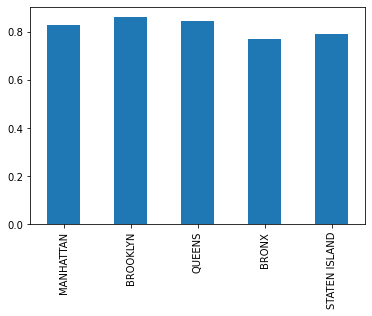

In [255]:
total_non_chain = uniq_res_merge['BORO'].value_counts()
non_chain_res = uniq_res_merge['BORO'][uniq_res_merge['is_non_chain'] == 1].value_counts()
(non_chain_res/total_non_chain).plot(kind='bar')

#### Q.8. Plot the popularity of cuisines. 
Which cuisines are the most well-represented among all restaurants? Define the popularity of a cuisine as the number of restaurants serving that cuisine. Plot the popularity of the top 20 cuisines.

<AxesSubplot:>

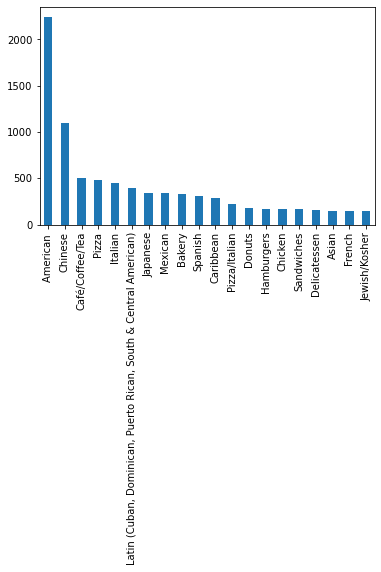

In [328]:
#Using uniq_res_merge dataframe which contains list of unique restaurants - 'DBA' and 'RESTAURANT' unique pairs.
uniq_res_merge['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')

#### Q.9.Plot the cuisines among restaurants which never got cited for violations. 
Ideally, you should explore and see what happens when there is no violation, but here I will just tell you: the ’VIOLATION
CODE’ field is missing. First, find the restaurants that were never cited for a code violation. The compute the popularity of each cuisine among these “clean” restaurants. Plot the popularity of the top-20 among these cuisines.

<AxesSubplot:>

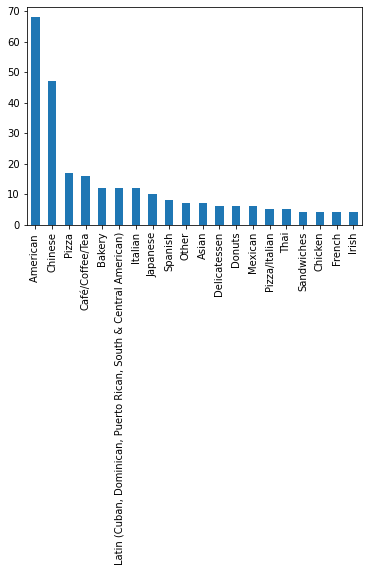

In [366]:
violation_mask=uniq_res_merge['VIOLATION CODE'].isna()
res_no_viol = uniq_res_merge[violation_mask]
res_no_viol['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')

In [354]:
uniq_res_merge.columns

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'RESTAURANT',
       'is_non_chain_x', 'is_non_chain_y', 'is_non_chain', 'Violation Status'],
      dtype='object')

#### Q.10. What cuisines tend to be the “cleanest”?
• Select all cuisines for which there were at least 20 restaurants representing that cuisine.
• For each such cuisine, compute the ratio of the counts in Q9 to Q8.This is the ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine.
• Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are “most likely to be clean.”

In [349]:
clean_res_cuisine = pd.pivot_table(uniq_res_merge, values='RESTAURANT', index=['CUISINE DESCRIPTION','Violation Status'],
                    aggfunc=np.sum)
clean_res_cuisine

RESTAURANT
CUISINE DESCRIPTION           Violation Status                                                   
Afghan                        0                        BAHAR MASALA 984 CONEY ISLAND AVENUE 11230
                              1                 AFGHAN KEBAB HOUSE #1 764 9 AVENUE 10019BAKHTE...
African                       0                 EYE ADOM AFRICAN & SPANISH RESTAURANT 1263 EDW...
                              1                 HALAL COFFEE SHOP RESTAURANT 1150       SHERMA...
American                      0                 GLORIOUS FOOD 522 EAST   74 STREET 10021DOMINO...
...                                                                                           ...
Turkish                       0                        OPERA CAFE LOUNGE 2255 EMMONS AVENUE 11235
                              1                 KEBAB HOUSE 25505 NORTHERN BOULEVARD 11362TURK...
Vegetarian                    1                 CANDLE CAFE 1307 3 AVENUE 10021VILLAGE NATURAL...
Vietnamese/Cambodian/Malaysia 0                 PHO BANG RESTAURANT 157 MOTT STREET 10013PHO V...
                              1                 PHO BAC VIETNAMESE SEAFOOD CUISINE 8278       ...

[126 rows x 1 columns]